<a href="https://colab.research.google.com/github/bert13069598/Advanced-AI/blob/master/Lecture20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST database

## PyTorch provides useful package for this task

In [27]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습:", device)

다음 기기로 학습: cuda


## Batch size, Epoch 횟수 등 초기 설정 수행

In [28]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

# hyperparameters
training_epochs = 15
batch_size = 100

## PyTorch에서 제공되는 MNIST 클래스 사용

In [29]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)

In [30]:
print('mnist_train :', len(mnist_train))
print('mnist_test :', len(mnist_test))
train_features, train_labels = next(iter(data_loader))
print("Feature batch shape :", {train_features.size()})
print("Labels batch shape :", {train_labels.size()})

mnist_train : 60000
mnist_test : 10000
Feature batch shape : {torch.Size([100, 1, 28, 28])}
Labels batch shape : {torch.Size([100])}


## Our baseline : input -> output connection (i.e., no hidden layer)

In [32]:
# MNIST data image of shape 28 x 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 Softmax 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

## Start learning

In [33]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정
  avg_cost = 0
  total_batch = len(data_loader)
  for X, Y in data_loader:
    # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서
    X = X.view(-1, 28 * 28).to(device)
    # 레이블은 one-hot 인코딩이 된 상태가 아니라 0 ~ 9의 정수
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
    
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost = 0.534904122
Epoch: 0002 cost = 0.359337002
Epoch: 0003 cost = 0.331338406
Epoch: 0004 cost = 0.316336244
Epoch: 0005 cost = 0.307073414
Epoch: 0006 cost = 0.300330311
Epoch: 0007 cost = 0.294883221
Epoch: 0008 cost = 0.290776223
Epoch: 0009 cost = 0.287194371
Epoch: 0010 cost = 0.284428656
Epoch: 0011 cost = 0.281894892
Epoch: 0012 cost = 0.279716760
Epoch: 0013 cost = 0.277680069
Epoch: 0014 cost = 0.275992393
Epoch: 0015 cost = 0.274349064
Learning finished


## After training, we now can estimate the accuracy of our model

Accuracy: 0.8887999653816223
Label:  8
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


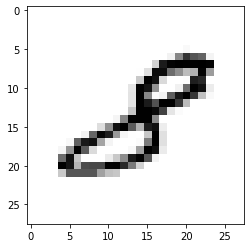

In [34]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않음
  X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())
  
  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()